# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Overview

In [19]:
df = pd.read_csv('atr_equity_curve_SOL.csv')
#df['Time'] = pd.to_datetime(df['Time'])
df.tail()

,Capital,Time
107,126047.511542,2025-06-22 13:15:00+00:00
108,126440.843911,2025-06-24 11:00:00+00:00
109,125440.843911,2025-06-24 16:45:00+00:00
110,126440.843911,2025-06-25 13:30:00+00:00
111,127440.843911,2025-06-27 01:00:00+00:00


In [20]:
df['Capital'] = df['Capital'] - 100* (df.index + 1)

In [21]:
df['tp/sl'] = df['Capital'] - df['Capital'].shift(1)

In [22]:
df.loc[df.index==0, 'tp/sl'] = df['Capital']- 100000

In [23]:
df.head()

,Capital,Time,tp/sl
0,100900.0,2024-12-02 03:30:00+00:00,900.0
1,99800.0,2024-12-05 02:30:00+00:00,-1100.0
2,100700.0,2024-12-08 09:45:00+00:00,900.0
3,99600.0,2024-12-08 23:45:00+00:00,-1100.0
4,100500.0,2024-12-09 03:45:00+00:00,900.0


In [24]:
df['tp/sl'].sum()

np.float64(16240.843911092816)

In [ ]:
df.head()

,Capital,Time,tp/sl
0,102000.0,2024-12-03 16:45:00+03:00,2000.0
1,101000.0,2024-12-05 15:45:00+03:00,-1000.0
2,100000.0,2024-12-07 04:15:00+03:00,-1000.0
3,102000.0,2024-12-09 10:00:00+03:00,2000.0
4,101000.0,2024-12-09 10:45:00+03:00,-1000.0


# Merged Process

In [62]:
coins = ['BTC','ETH','SOL','XRP','PEPE','DOGE']
dfs = {coin: pd.read_csv(f"atr_equity_curve_{coin}.csv") for coin in coins}

initial_capital = 100000  # Başlangıç sermayesi

for coin, df in dfs.items():
    # 'tp/sl' sütununu hesapla
    df['Capital'] = df['Capital'] - 65* (df.index + 1)
    df['tp/sl'] = df['Capital'] - df['Capital'].shift(1)

    # İlk satırı düzelt (Capital - initial_capital)
    df.loc[df.index == 0, 'tp/sl'] = df['Capital'].iloc[0] - initial_capital

    # Coin adını ekle (birleştirme için)
    df['coin'] = coin # Hangi coin'e ait olduğunu belirtmek için

# Tüm DataFrame'leri birleştir
combined_df = pd.concat(dfs.values(), ignore_index=True)

combined_df = combined_df.sort_values('Time')
combined_df['Time'] = pd.to_datetime(combined_df['Time'])
combined_df['Capital'] = combined_df['tp/sl'].cumsum()

# Explorer Data Analysis

In [63]:
combined_df['tp/sl'].sum() / 1000

np.float64(123.18701792282269)

In [42]:
combined_df.resample('M', on='Time')['tp/sl'].agg({'count','sum'})

/tmp/ipython-input-1844296721.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  combined_df.resample('M', on='Time')['tp/sl'].agg({'count','sum'})


,sum,count
Time,,
2024-12-31 00:00:00+00:00,4037.580600,107
2025-01-31 00:00:00+00:00,14107.332158,80
2025-02-28 00:00:00+00:00,25003.767003,97
2025-03-31 00:00:00+00:00,7193.051611,87
2025-04-30 00:00:00+00:00,25519.139886,104
2025-05-31 00:00:00+00:00,41829.641635,112
2025-06-30 00:00:00+00:00,6561.505029,92
2025-07-31 00:00:00+00:00,-1065.000000,1


In [33]:
combined_df.resample('M', on='Time')['tp/sl'].sum() / 1000

/tmp/ipython-input-3931899807.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  combined_df.resample('M', on='Time')['tp/sl'].sum() / 1000


,tp/sl
Time,
2024-12-31 00:00:00+00:00,2.967581
2025-01-31 00:00:00+00:00,13.307332
2025-02-28 00:00:00+00:00,24.033767
2025-03-31 00:00:00+00:00,6.323052
2025-04-30 00:00:00+00:00,24.479140
2025-05-31 00:00:00+00:00,40.709642
2025-06-30 00:00:00+00:00,5.641505
2025-07-31 00:00:00+00:00,-1.075000


In [34]:
combined_df.resample('M', on='Time')['tp/sl'].count()

/tmp/ipython-input-2738141151.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  combined_df.resample('M', on='Time')['tp/sl'].count()


,tp/sl
Time,
2024-12-31 00:00:00+00:00,107
2025-01-31 00:00:00+00:00,80
2025-02-28 00:00:00+00:00,97
2025-03-31 00:00:00+00:00,87
2025-04-30 00:00:00+00:00,104
2025-05-31 00:00:00+00:00,112
2025-06-30 00:00:00+00:00,92
2025-07-31 00:00:00+00:00,1


In [35]:
combined_df.count()

,0
Capital,680
Time,680
tp/sl,680
coin,680


# Equity Curve

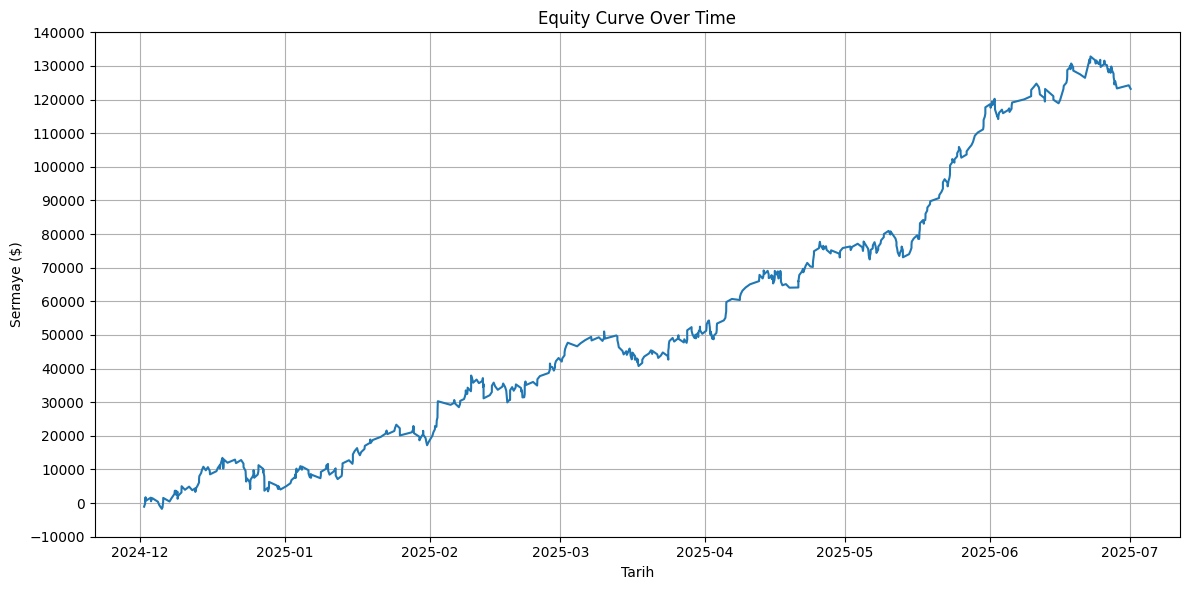

In [64]:
# ATR Steps
plt.figure(figsize=(12, 6))
plt.plot(pd.to_datetime(combined_df['Time']), combined_df['Capital'])
plt.title("Equity Curve Over Time")
plt.xlabel("Tarih")
plt.ylabel("Sermaye ($)")

# Y eksenini 10,000'er artacak şekilde ayarla
min_capital = int(combined_df['Capital'].min())
max_capital = int(combined_df['Capital'].max())
plt.yticks(range(min_capital - min_capital % 10000, max_capital + 10000, 10000))

plt.grid(True)
plt.tight_layout()
plt.show()

# Sharpe Ratio

In [45]:
def sharpe_ratio_from_capital(df, capital_col='Capital', time_col='Time', risk_free_rate=0.02, annualization_factor=252):
    """
    Bir DataFrame'deki kümülatif sermaye (capital) verisinden Sharpe Oranını hesaplar.

    :param df: Trade sonuçlarını içeren pandas DataFrame.
    :param capital_col: Toplam kar/zararı gösteren sütun adı (varsayılan: 'Capital').
    :param time_col: Tarih/saat bilgisini içeren sütun adı (varsayılan: 'Time').
    :param risk_free_rate: Yıllık risksiz faiz oranı (varsayılan: %2 = 0.02).
    :param annualization_factor: Yıllıklandırma faktörü (genellikle iş günü sayısı, varsayılan: 252).
    :return: Sharpe Oranı (float).
    """

    # 1. 'Time' sütununu datetime formatına çevir ve indeks yap
    df[time_col] = pd.to_datetime(df[time_col])
    df = df.set_index(time_col)

    # 2. Günlük kapanış sermaye değerlerini al
    # Burada, her günün son işlemindeki Capital değerini alıyoruz.
    daily_capital = df[capital_col].resample('D').last().dropna()

    # 3. Günlük getirileri hesapla
    # İlk getiriyi NaN yapmamak için .pct_change() kullanıyoruz, bu logaritmik getiri yerine basit getiri verir.
    daily_returns = daily_capital.pct_change().dropna()

    # 4. Ortalama günlük getiri ve standart sapma (volatilite) hesaplama
    avg_daily_return = daily_returns.mean()
    std_daily_return = daily_returns.std()

    # Eğer standart sapma 0 ise (getirilerde hiç değişim yoksa), tanımsız olmaması için büyük bir sayı dönebiliriz.
    if std_daily_return == 0:
        return np.inf if avg_daily_return > 0 else 0

    # 5. Sharpe Oranı Hesaplama
    # Sharpe Oranı = (Yıllık Ortalama Getiri - Risksiz Oran) / Yıllık Standart Sapma
    # Günlük verileri yıllıklandırma:
    # Getiri: Günlük Ortalama * annualization_factor
    # Volatilite: Günlük Standart Sapma * sqrt(annualization_factor)

    # Risksiz oranı günlük olarak çevirme (Genellikle risksiz oranı yıllık bırakıp formülde olduğu gibi yıllıklandırma yapılır)
    # Ancak finansal analizde, genellikle risksiz oran direkt yıllık bırakılır ve diğerleri yıllıklandırılır.

    # Yıllıklandırılmış Ortalama Getiri
    annualized_return = avg_daily_return * annualization_factor

    # Yıllıklandırılmış Volatilite
    annualized_volatility = std_daily_return * np.sqrt(annualization_factor)

    # Sharpe Oranı
    sharpe_ratio = (annualized_return - risk_free_rate) / annualized_volatility

    return sharpe_ratio

In [65]:
sharpe_ratio = sharpe_ratio_from_capital(combined_df, annualization_factor=365) # Because Cryptocurrencies

print(f"Sharpe Ratio: {sharpe_ratio:.4f}")

Sharpe Ratio: 2.8647


# Max Drawdown

In [ ]:
def analyze_trade_performance(df, capital_col='Capital', time_col='Time'):
    """
    Calculates Maximum Drawdown (MDD) and Recovery Time from a time-series of capital.

    :param df: pandas DataFrame containing trade results.
    :param capital_col: The column name for the cumulative profit/loss (Capital).
    :param time_col: The column name for the date/time information (Time).
    :return: A dictionary containing MDD percentage, the start/end dates of the MDD,
             and the time taken for recovery (if applicable).
    """

    # 1. Prepare the Data
    df = df.copy()
    df[time_col] = pd.to_datetime(df[time_col])
    df = df.set_index(time_col)

    # Ensure the capital series is sequential
    capital_series = df[capital_col]

    # 2. Calculate Cumulative Maximum (Peak)
    # The running high-water mark of the capital.
    cumulative_max = capital_series.expanding(min_periods=1).max()

    # 3. Calculate Drawdown (as a percentage)
    # Drawdown = (Current Capital - Peak Capital) / Peak Capital
    drawdown_series = (capital_series - cumulative_max) / cumulative_max

    # 4. Find Maximum Drawdown (MDD)
    max_drawdown = drawdown_series.min() * 100

    # Locate the lowest point of the drawdown
    trough_date = drawdown_series.idxmin()
    trough_value = capital_series.loc[trough_date]

    # Find the peak just before the trough
    peak_capital_before_trough = cumulative_max.loc[:trough_date].iloc[-1]
    peak_date = capital_series[capital_series == peak_capital_before_trough].index[-1]

    # 5. Calculate Recovery Time

    # Find the capital value needed to recover (the peak value before the drawdown)
    recovery_target = capital_series.loc[peak_date]

    # Look for the first point after the trough date where capital exceeds or equals the recovery target
    recovery_data = capital_series.loc[trough_date:]

    # Filter for values that have recovered (Capital >= Recovery Target)
    recovered_points = recovery_data[recovery_data >= recovery_target]

    if not recovered_points.empty:
        # The date when the capital first hit the recovery target after the trough
        recovery_date = recovered_points.index[0]

        # Calculate the duration from the start of the drawdown (Peak Date)
        recovery_duration = recovery_date - peak_date
        recovery_info = {
            "recovery_date": recovery_date,
            "recovery_time": str(recovery_duration)
        }
    else:
        recovery_info = {
            "recovery_date": "N/A (Still in Drawdown)",
            "recovery_time": "N/A (Still in Drawdown)"
        }


    return {
        "max_drawdown_percent": f"{max_drawdown:.2f}%",
        "mdd_peak_date": peak_date.strftime('%Y-%m-%d %H:%M'),
        "mdd_trough_date": trough_date.strftime('%Y-%m-%d %H:%M'),
        "mdd_trough_value": trough_value,
        "recovery_time": recovery_info['recovery_time'],
        "recovery_date": recovery_info['recovery_date'].strftime('%Y-%m-%d %H:%M') if recovery_info['recovery_date'] != "N/A (Still in Drawdown)" else recovery_info['recovery_date']
    }

In [68]:
combined_df['Capital'] = combined_df['Capital'] + 100000
analysis_results = analyze_trade_performance(combined_df)

# Print results
print("--- Trade Performance Analysis ---")
print(f"Maximum Drawdown (MDD): {analysis_results['max_drawdown_percent']}")
print(f"MDD Peak Date: {analysis_results['mdd_peak_date']}")
print(f"MDD Trough Date: {analysis_results['mdd_trough_date']}")
print(f"Recovery Date: {analysis_results['recovery_date']}")
print(f"Recovery Time (Duration from Peak to Recovery): {analysis_results['recovery_time']}")

--- Trade Performance Analysis ---
Maximum Drawdown (MDD): -8.78%
MDD Peak Date: 2024-12-18 14:45
MDD Trough Date: 2024-12-28 09:00
Recovery Date: 2025-01-15 13:30
Recovery Time (Duration from Peak to Recovery): 27 days 22:45:00
